
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [75]:
valencia_pollution_df = pd.read_csv(os.path.join('valencia_pollution_dataset.csv'))

valencia_pollution_df.head(10)

display(valencia_pollution_df.head())

general_info = pd.DataFrame({
    'Número de entradas': [valencia_pollution_df.shape[0]],
    'Número de columnas': [valencia_pollution_df.shape[1]],
    'Filas duplicadas': [valencia_pollution_df.duplicated().sum()],
    'Columnas con valores nulos': [valencia_pollution_df.isnull().any().sum()],
    'Celdas con valores nulos': [valencia_pollution_df.isnull().sum().sum()],
})

display(general_info)

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,10,71.0,0.7,8.0,3.0,Tráfico,2025-05-24T20:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
1,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,5,88.0,NaN,NaN,NaN,Fondo,2025-05-24T20:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,24,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,NaN,15,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
4,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,1.0,3,82.0,0.1,9.0,6.0,Tráfico,2025-05-24T20:20:04+00:00,Razonablemente Buena,NaN,NaN,NaN


,Número de entradas,Número de columnas,Filas duplicadas,Columnas con valores nulos,Celdas con valores nulos
0,396,18,0,10,2844


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [76]:
valencia_pollution_df['fecha_carga'] = pd.to_datetime(valencia_pollution_df['fecha_carga'])
fromDate = valencia_pollution_df['fecha_carga'].min()
toDate = valencia_pollution_df['fecha_carga'].max()

# En el video se comenta que objectid es el identificador de la estación de medida.
total_co_stations = (valencia_pollution_df.groupby('objectid')['co'].count() > 0).sum()


print(f"El rango temporal va desde {fromDate} hasta {toDate}.")
print(f"Hay {total_co_stations} estaciones de medida de CO en el dataset.")


El rango temporal va desde 2025-05-24 20:20:04+00:00 hasta 2025-05-26 10:20:13+00:00.
Hay 3 estaciones de medida de CO en el dataset.


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [77]:
high_co_mean_station_id = valencia_pollution_df.groupby('objectid')['co'].mean().sort_values(ascending=False).index[0]
print(f"El número de estación con el valor medio más alto de CO es {high_co_mean_station_id}.")

El número de estación con el valor medio más alto de CO es 26.


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

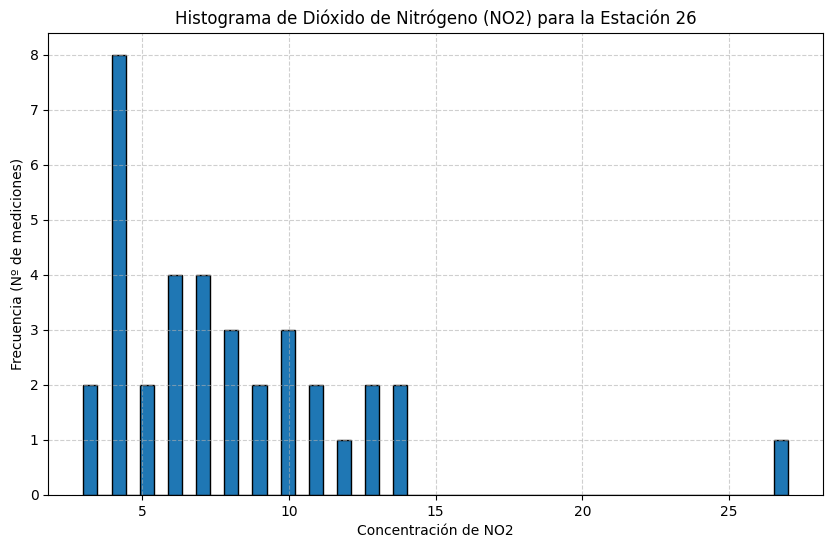

In [78]:
no2_df = valencia_pollution_df[valencia_pollution_df['objectid'] == high_co_mean_station_id]['no2'].copy()

plt.figure(figsize=(10, 6))
no2_df.hist(bins=50, edgecolor='black')

plt.title(f"Histograma de Dióxido de Nitrógeno (NO2) para la Estación {high_co_mean_station_id}")
plt.xlabel("Concentración de NO2")
plt.ylabel("Frecuencia (Nº de mediciones)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

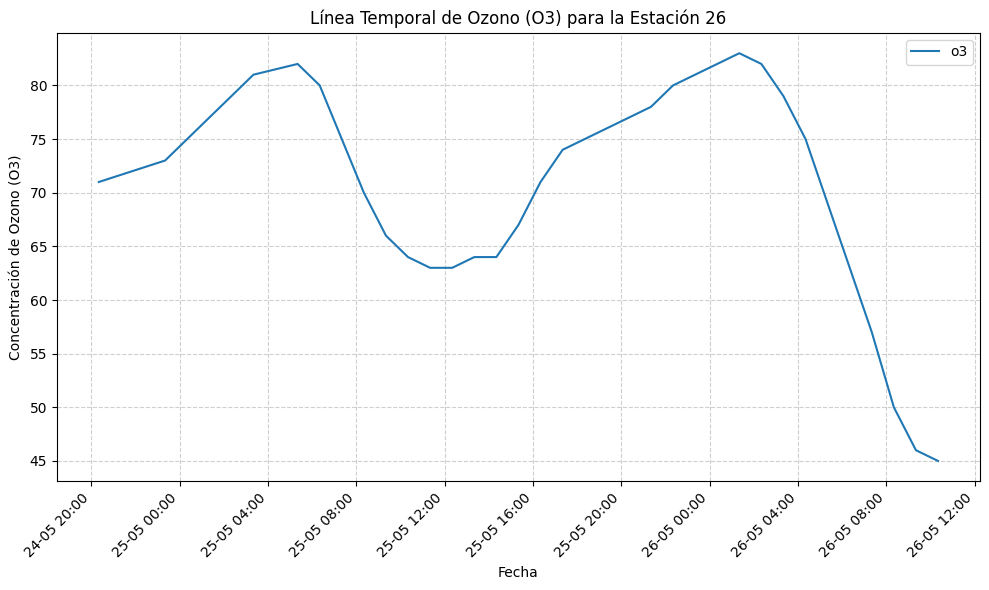

In [80]:
# La conversión ya está hecha en el ejercicio 2
# valencia_pollution_df['fecha_carga'] = pd.to_datetime(valencia_pollution_df['fecha_carga'])

o3_df = valencia_pollution_df[valencia_pollution_df['objectid'] == high_co_mean_station_id].loc[:, ['fecha_carga', 'o3']].copy().set_index('fecha_carga')

fig, ax = plt.subplots(figsize=(10, 6))
o3_df.plot(ax=ax) 
date_format = mdates.DateFormatter('%d-%m %H:%M')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.title(f"Línea Temporal de Ozono (O3) para la Estación {high_co_mean_station_id}")
plt.xlabel("Fecha")
plt.ylabel("Concentración de Ozono (O3)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()